In [259]:
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
rest_reviews=pd.read_pickle('/Volumes/DrewM_External/DataScience/Incubator_Challenge/Yelp_data/yelp_dataset/restaurant_reviews')

In [91]:
business=pd.read_feather('/Volumes/DrewM_External/DataScience/Incubator_Challenge/Yelp_data/yelp_dataset/business')

In [92]:
restaurants=business[business['categories'].str.contains("Restaurants",na=False)]

In [93]:
unq_rest_ids=restaurants['business_id'].unique()

In [258]:
unq_rest_ids

array(['QXAEGFB4oINsVuTFxEYKFQ', 'gnKjwL_1w79qoiV3IC_xQQ',
       '1Dfx3zM-rW4n-31KeC8sJg', ..., 'h3QErqS3OZgLJ5Tb6-sLyQ',
       'KnafX7T6qSAmSrLhd709vA', 'p1eUTUB_5hf1enoKYBV3DA'], dtype=object)

In [94]:
user_id_count=rest_reviews.user_id.value_counts().index.tolist()

In [95]:
test_reviews=rest_reviews[rest_reviews['user_id']==user_id_count[0]][0:100]

In [96]:
train_reviews=rest_reviews[rest_reviews['user_id']==user_id_count[0]][100:]

In [97]:
total_reviews=rest_reviews[rest_reviews['user_id']!=user_id_count[0]]

In [222]:
vectorizer = CountVectorizer(max_df=0.98, min_df = 2, stop_words='english')

In [223]:
X = vectorizer.fit_transform(train_reviews.text)

In [224]:
Y = vectorizer.get_feature_names()

In [175]:
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Review{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [225]:
train_df = pd.DataFrame(data=np.mean(X.toarray(),0), index=Y)

In [226]:
train_df = train_df/np.sum(train_df)

In [227]:
X2 = vectorizer.fit_transform(total_reviews.text[0:100000])

In [228]:
Y2 = vectorizer.get_feature_names()

In [229]:
total_df = pd.DataFrame(data=np.mean(X2.toarray(),0), index=Y2)

In [230]:
total_df_cut=total_df.reindex(Y,fill_value=0)

In [231]:
total_df_cut=total_df_cut/np.sum(total_df_cut)

In [232]:
Prop_prob=(train_df/total_df_cut)

In [233]:
review_list = test_reviews.business_id.to_list()

In [234]:
reviews_business = rest_reviews[rest_reviews.business_id==review_list[0]]

In [235]:
reviews_business.stars.mean()

3.7058823529411766

In [236]:
X3 = vectorizer.fit_transform(reviews_business.text)

In [237]:
Y3 = vectorizer.get_feature_names()

In [238]:
business_df = wm2df(X3,Y3)

In [239]:
business_df=business_df.reindex(columns=Y,fill_value=0)

In [240]:
np.sum(np.multiply(reviews_business.stars.to_numpy(),business_df.sum(axis=1).to_numpy()))/np.sum(business_df.sum(axis=1))

3.808201058201058

In [217]:
business_df = wm2df(X3,Y3)

In [218]:
business_df=business_df.reindex(columns=Y,fill_value=0)

In [220]:
business_df=np.multiply(business_df,Prop_prob.transpose())

/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


In [219]:
business_df=business_df.fillna(0)

In [242]:
business_df

,00,000,05,10,100,10oz,11,11am,11pm,12,...,zushi,zzzzzz,zzzzzzzz,天下第一包,小籠包,燉湯,過橋米線,重慶小面,錦袍燒賣皇,飄香榴蓮酥
Review0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review3,0.0,0.0,0.0,2.971554,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review57,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review58,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review59,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review60,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [241]:
mean_stars = np.zeros(len(review_list))
weighted_stars = np.zeros(len(review_list))
count = 0
for bus in review_list:
    reviews_business = rest_reviews[rest_reviews.business_id==bus]
    if reviews_business.shape[0] > 4:
        mean_stars[count] = reviews_business.stars.mean()
        X3 = vectorizer.fit_transform(reviews_business.text)
        Y3 = vectorizer.get_feature_names()
        business_df = wm2df(X3,Y3)
        business_df=business_df.reindex(columns=Y,fill_value=0)
        business_df=business_df.fillna(0)
        business_df=np.multiply(business_df,Prop_prob.transpose())
        weighted_stars[count] = np.sum(np.multiply(reviews_business.stars.to_numpy(),business_df.sum(axis=1).to_numpy()))/np.sum(business_df.sum(axis=1))
    else:
        mean_stars[count] = reviews_business.stars.mean()
        weighted_stars[count] = math.nan   
    count += 1

/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWar

/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWar

/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWar

In [246]:
weighted_stars2=weighted_stars[~np.isnan(weighted_stars)]

In [247]:
mean_stars2=mean_stars[~np.isnan(weighted_stars)]

In [248]:
real_stars=test_reviews.stars.to_numpy()

In [249]:
real_stars=real_stars[~np.isnan(weighted_stars)]

In [197]:
import matplotlib.pyplot as plt

In [243]:
np.sum(business_df.sum(axis=1))

2522.183192628237

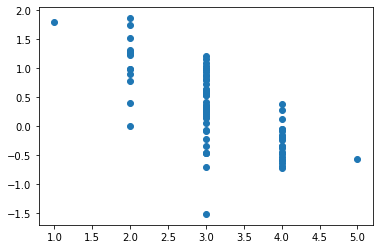

In [250]:
plt.scatter(real_stars,weighted_stars2-real_stars)

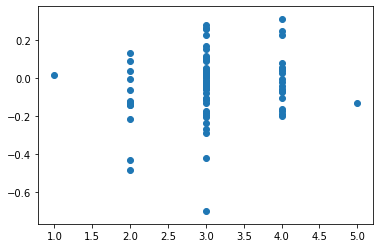

In [253]:
plt.scatter(real_stars,np.abs(weighted_stars2-real_stars)-np.abs(mean_stars2-real_stars))

In [254]:
np.mean(np.abs(weighted_stars2-real_stars))

0.6201779219860656

In [255]:
np.mean(np.abs(mean_stars2-real_stars))

0.6601522574739392

In [245]:
weighted_stars

array([3.8736342 , 3.31725193, 3.80071595,        nan, 3.84957353,
       3.86830071,        nan, 3.18574535, 3.36369068, 4.27648402,
       3.8816986 , 2.54062899, 3.28919832,        nan, 3.92075283,
              nan, 2.65209314, 3.6534495 , 2.0057528 , 3.8139788 ,
       4.44381343, 3.59733056, 2.98278264, 3.53231564, 3.3223996 ,
              nan, 2.98097056,        nan, 3.42301717, 3.4695522 ,
              nan, 2.39624477, 3.37326245,        nan,        nan,
       2.30632146,        nan, 3.94881282, 4.3783102 , 3.30887682,
       3.35379241, 3.41091475, 3.6224496 , 3.535307  , 3.31725193,
       4.08978009, 3.99375016, 2.78275836, 2.89731103, 3.2226798 ,
       4.12635944,        nan, 3.99210628, 3.73698324,        nan,
       4.03835927,        nan, 4.20876474, 3.93715524, 3.28329369,
              nan, 2.7865157 , 3.55688045, 2.54787815, 3.22056369,
       3.13616571, 3.52681637, 3.0521025 ,        nan,        nan,
              nan, 3.53676792, 3.58969639, 3.28317853, 2.80357

In [204]:
Y[-8:]

['yelpers', 'yes', 'yoga', 'yogurt', 'yonge', 'york', 'young', 'yummy']

In [205]:
np.sum(total_df_cut)

0    1.0
dtype: float64

In [206]:
np.sum(total_df)

0    32.00529
dtype: float64

In [207]:
np.sum(train_df)

0    1.0
dtype: float64